In [1]:
import pandas as pd

data=pd.read_csv(r"C:\Users\Nishitha T\OneDrive\Documents\NareshIT\Data Files\winequality_red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

**Seperate Input and Target Featues**

In [5]:
X=data.drop('quality',axis=1) # dataframe
y=data['quality']  # series type

In [6]:
from sklearn.feature_selection import mutual_info_classif

MI=mutual_info_classif(X,y)
MI

array([0.02949982, 0.12607911, 0.05435916, 0.02227736, 0.04551513,
       0.01412129, 0.07847714, 0.07898719, 0.01584641, 0.08988357,
       0.17898534])

In [7]:
d=pd.DataFrame(MI,
               columns=['Information gain'],
              index=X.columns)
d.sort_values('Information gain',ascending=False)

               

,Information gain
alcohol,0.178985
volatile acidity,0.126079
sulphates,0.089884
density,0.078987
total sulfur dioxide,0.078477
citric acid,0.054359
chlorides,0.045515
fixed acidity,0.029500
residual sugar,0.022277
pH,0.015846


<Axes: >

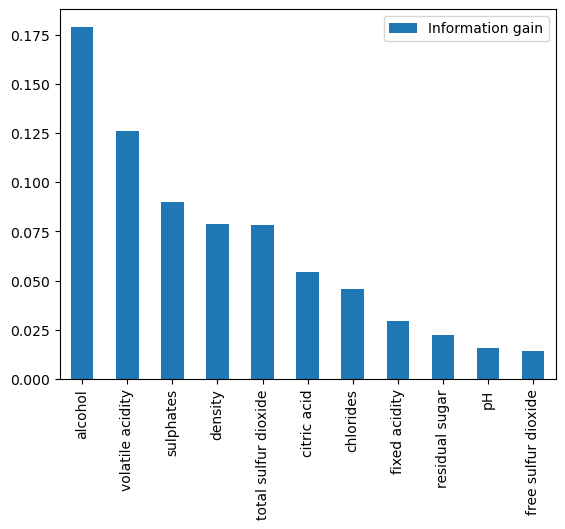

In [8]:
d.sort_values('Information gain',ascending=False).plot(kind='bar')

In [9]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif

top_5=SelectKBest(mutual_info_classif,k=6)
val=top_5.fit(X,y)

In [10]:
val.get_support()

array([False,  True,  True, False, False, False,  True,  True, False,
        True,  True])

In [11]:
val.get_feature_names_out()

array(['volatile acidity', 'citric acid', 'total sulfur dioxide',
       'density', 'sulphates', 'alcohol'], dtype=object)

In [12]:
features=['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol']
df=pd.DataFrame()
df=data[features]
df

,volatile acidity,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,0.700,0.076,34.0,0.99780,0.56,9.4
1,0.880,0.098,67.0,0.99680,0.68,9.8
2,0.760,0.092,54.0,0.99700,0.65,9.8
3,0.280,0.075,60.0,0.99800,0.58,9.8
4,0.700,0.076,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...
1594,0.600,0.090,44.0,0.99490,0.58,10.5
1595,0.550,0.062,51.0,0.99512,0.76,11.2
1596,0.510,0.076,40.0,0.99574,0.75,11.0
1597,0.645,0.075,44.0,0.99547,0.71,10.2


In [13]:
X = df

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape,X_test.shape

((1279, 6), (320, 6))

In [16]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
predictions=model.predict(X_test)
predictions

array([5.32277199, 5.10799428, 5.63398409, 5.4212652 , 5.73318005,
       5.29214355, 5.09439655, 5.12883142, 5.75722841, 5.74297402,
       6.09020634, 5.31865873, 5.51907369, 5.2144024 , 5.45819862,
       6.42479817, 5.17921614, 5.5899701 , 6.54010284, 5.25415011,
       5.41095362, 5.19423368, 5.98498614, 6.31695722, 5.35148069,
       5.53107311, 6.37115675, 5.41174158, 5.20466714, 6.23049008,
       5.26885527, 5.59298366, 5.80060344, 5.33350055, 5.49681412,
       5.01110897, 6.23888074, 5.75723158, 5.55221375, 6.15984644,
       5.44838088, 5.22448651, 6.11272652, 5.1572054 , 5.84104094,
       5.79713653, 6.44337011, 5.52405641, 5.13886959, 5.53851367,
       5.22330874, 5.11674917, 5.55963591, 6.44711431, 5.12279213,
       5.01875699, 6.01069377, 5.49750409, 5.8312663 , 5.38485343,
       5.56796516, 5.91881858, 5.31716023, 5.40387316, 6.40516289,
       5.48286614, 6.33328223, 5.4646447 , 6.53954856, 5.36784393,
       6.42857072, 4.75188696, 5.81266466, 5.83210447, 6.14779

In [18]:
print("Predictions: ")
print(model.predict([X_test.values[0]]))

Predictions: 
[5.32277199]


In [19]:
print("Predictions: ")
model.predict([[5,4,2,3,1,2]])

Predictions: 


array([9.71628747])

In [20]:
actual_pred=pd.DataFrame(zip(y_test,predictions),columns=['Y_test','Predictions'])
actual_pred

# Create one more column error or residual ; Actaul-predictions
residul=[i-j for i,j in zip(actual_pred['Y_test'],actual_pred['Predictions'])]
actual_pred['Residual']=residul
actual_pred


,Y_test,Predictions,Residual
0,6,5.322772,0.677228
1,5,5.107994,-0.107994
2,6,5.633984,0.366016
3,5,5.421265,-0.421265
4,6,5.733180,0.266820
...,...,...,...
315,6,5.695868,0.304132
316,5,4.983215,0.016785
317,5,5.230988,-0.230988
318,6,6.167582,-0.167582


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')


MAE: 0.5076908187434974
MSE: 0.3951208143938267
RMSE: 0.6285863619215952
R-squared: 0.3953829047964278


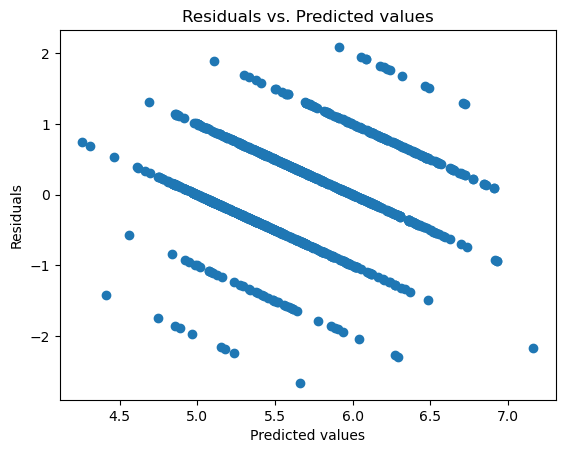

In [23]:
import matplotlib.pyplot as plt

preds = model.predict(X_train)
residuals = y_train - preds

plt.scatter(preds, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted values")
plt.show()

In [24]:
from statsmodels.stats.stattools import durbin_watson
dw_stat=round(durbin_watson(residuals),2)
print(f"Durbin-Watson statistics: {dw_stat}")

Durbin-Watson statistics: 2.0


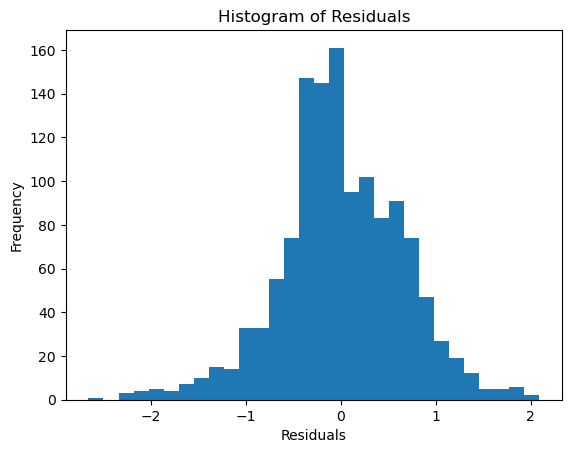

In [25]:
import scipy.stats as stats

plt.hist(residuals,bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

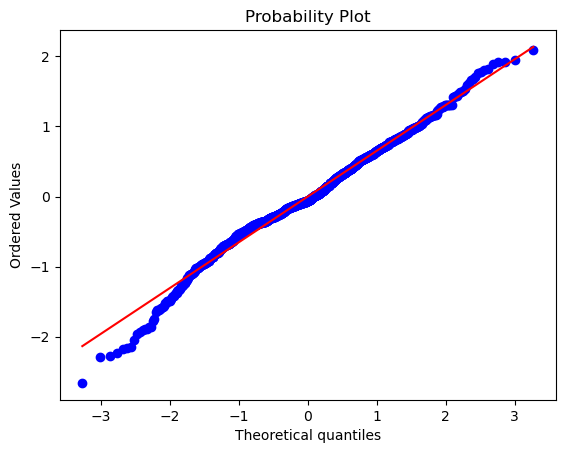

In [26]:
stats.probplot(residuals,dist="norm", plot=plt)
plt.show()

In [27]:
model.coef_

array([-1.06682647e+00, -1.66587038e+00, -2.50976926e-03,  8.66486694e+00,
        8.53907014e-01,  2.83134596e-01])

In [28]:
model.intercept_

-5.695856152055808

In [29]:
model.feature_names_in_

array(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'], dtype=object)

In [30]:
X_test.values[0]

array([ 0.56  ,  0.114 , 46.    ,  0.9971,  0.66  ,  9.6   ])

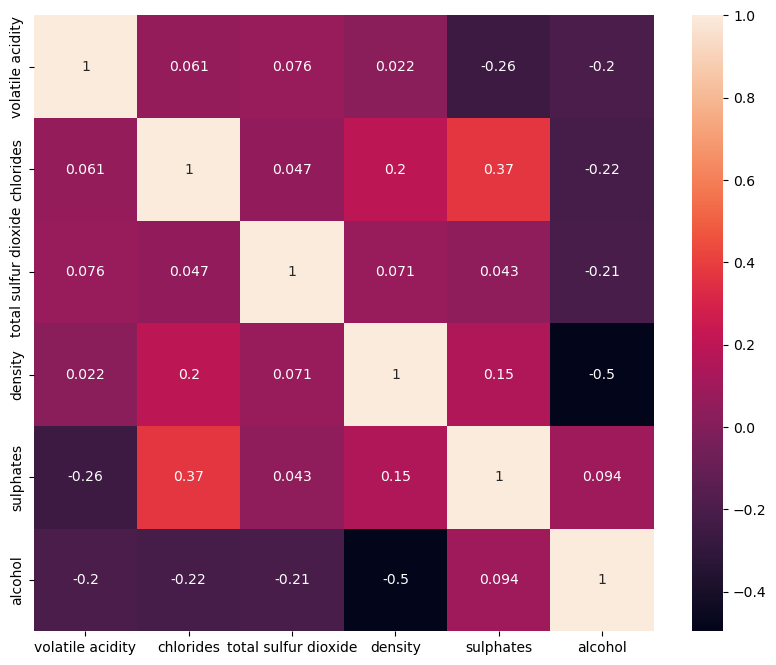

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [32]:
import warnings
warnings.filterwarnings("ignore")
model.predict([X_test.values[0]])

array([5.32277199])

In [33]:
import os
try:
    directory= os.getcwd()
    folder_name='wine_models'
    path=os.path.join(directory,folder_name)
    os.makedirs(path) 
except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Nishitha T\\OneDrive\\Documents\\NareshIT\\ML\\Wine_Analysis\\wine_models'


In [34]:
import pickle
pickle.dump(model,
            open(f'{path}\\wine_quality_model.pkl','wb'))

In [35]:
f'{path}\\wine_quality_model.pkl'

'C:\\Users\\Nishitha T\\OneDrive\\Documents\\NareshIT\\ML\\Wine_Analysis\\wine_models\\wine_quality_model.pkl'

In [36]:
model = pickle.load(open(f'{path}\\wine_quality_model.pkl','rb'))
model

LinearRegression()

In [37]:
model.predict([[1,2,3,4,5,6],
              [2,3,4,5,6,7]])

array([30.52585771, 37.59255964])

In [38]:
import joblib

joblib.dump(model, f'{path}\\wine_quality_model.joblib')

saved_model = joblib.load(f'{path}\\wine_quality_model.joblib')

y_pred = saved_model.predict(X_test)

print("Predictions:", y_pred)


Predictions: [5.32277199 5.10799428 5.63398409 5.4212652  5.73318005 5.29214355
 5.09439655 5.12883142 5.75722841 5.74297402 6.09020634 5.31865873
 5.51907369 5.2144024  5.45819862 6.42479817 5.17921614 5.5899701
 6.54010284 5.25415011 5.41095362 5.19423368 5.98498614 6.31695722
 5.35148069 5.53107311 6.37115675 5.41174158 5.20466714 6.23049008
 5.26885527 5.59298366 5.80060344 5.33350055 5.49681412 5.01110897
 6.23888074 5.75723158 5.55221375 6.15984644 5.44838088 5.22448651
 6.11272652 5.1572054  5.84104094 5.79713653 6.44337011 5.52405641
 5.13886959 5.53851367 5.22330874 5.11674917 5.55963591 6.44711431
 5.12279213 5.01875699 6.01069377 5.49750409 5.8312663  5.38485343
 5.56796516 5.91881858 5.31716023 5.40387316 6.40516289 5.48286614
 6.33328223 5.4646447  6.53954856 5.36784393 6.42857072 4.75188696
 5.81266466 5.83210447 6.14779237 5.21147925 6.73898891 5.91805447
 6.13934296 6.48257987 5.50203668 6.41917182 5.3837464  5.72616691
 5.66089455 6.22762926 5.38264132 5.88596903 6.294